# Data Analysis

In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import FuncFormatter

rating_and_user = pd.read_csv('ratings.csv', header = 0, delimiter=',')

rating_and_user = rating_and_user.drop(rating_and_user.columns[[1, 3]], axis = 1)

# print(rating_and_user)

## Proportion of Each Rating

In [2]:
# Show Head
rating_and_user.head(10)

,userId,rating
0,1,3.5
1,1,3.5
2,1,3.5
3,1,3.5
4,1,3.5
5,1,3.5
6,1,4.0
7,1,4.0
8,1,4.0
9,1,4.0


In [3]:
# Show Proportion for Each Rating
list_of_rating_values = []
list_of_rating_value_proportions = []
for group in sorted(rating_and_user.groupby(by='rating')):
    list_of_rating_values.append((group[0]))
    list_of_rating_value_proportions.append(len(group[1])/float(len(rating_and_user)))
    print (group[0], len(group[1])/float(len(rating_and_user)))

0.5 0.011956092777379978
1.0 0.034036152424595616
1.5 0.013962416394224415
2.0 0.07154890913184492
2.5 0.04416931917345287
3.0 0.2145568285777042
3.5 0.11000635341645257
4.0 0.2780926430817435
4.5 0.0767401908664901
5.0 0.14493109415611186


In [4]:
print (list_of_rating_values)

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


In [5]:
print (list_of_rating_value_proportions)

[0.011956092777379978, 0.034036152424595616, 0.013962416394224415, 0.07154890913184492, 0.04416931917345287, 0.2145568285777042, 0.11000635341645257, 0.2780926430817435, 0.0767401908664901, 0.14493109415611186]


In [6]:
# Convert both Lists to Numpy Array
np_list_of_rating_values = np.asarray(list_of_rating_values)
np_list_of_rating_value_proportions = np.asarray(list_of_rating_value_proportions)
type(np_list_of_rating_values)

numpy.ndarray

In [7]:
# Check Type of Second List
type(np_list_of_rating_value_proportions)

numpy.ndarray

In [8]:
# Find the Max of Numpy Array for Proportions
np.amax(np_list_of_rating_value_proportions) 

0.27809264308174347

In [9]:
# Create a Histogram
hist, bin_edges = np.histogram(np_list_of_rating_value_proportions, bins = 6)
print(hist)
print(bin_edges)

[4 2 2 0 1 1]
[ 0.01195609  0.05631218  0.10066828  0.14502437  0.18938046  0.23373655
  0.27809264]


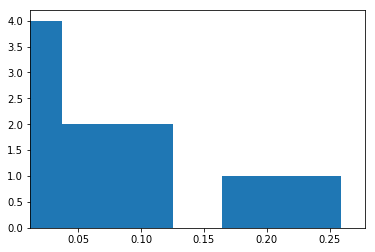

In [10]:
# Display with Matplotlib --- NEEDS MORE WORK
import matplotlib.pyplot as plt
plt.bar(bin_edges[:-1], hist, width = .05)
plt.xlim(min(bin_edges), max(bin_edges))
plt.show()

## Number of Ratings per User

In [11]:
# Show Number of Ratings per User
list_of_rating_numbers = []
for group in sorted(rating_and_user.groupby(by='userId')):
    list_of_rating_numbers.append(len(group[1]))
# print(list_of_rating_numbers)

In [12]:
# Convert to Numpy Array
np_list_rating_nums = np.asarray(list_of_rating_numbers)
type(np_list_rating_nums)

numpy.ndarray

In [13]:
# Find the Max of Numpy Array for Range
np.amax(np_list_rating_nums) 

9254

In [14]:
# Create a Histogram
hist, bin_edges = np.histogram(np_list_rating_nums, bins = range(500))
# print(hist)
# print(bin_edges)

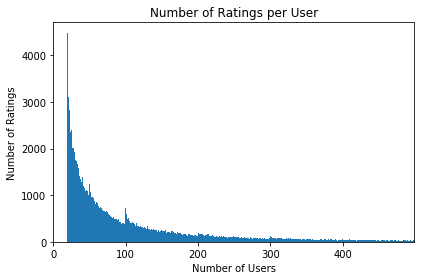

In [19]:
# Display with Matplotlib
plt.bar(bin_edges[:-1], hist, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.title('Number of Ratings per User')
plt.xlabel('Number of Users')
plt.ylabel('Number of Ratings')
plt.tight_layout()
plt.savefig('Images/Number_of_Ratings_per_User')
plt.show()

## Average Rating for Each User

In [20]:
average_rating_list = []
for rating_and_user in sorted(rating_and_user.groupby(by='userId')):
    rating_and_user = pd.DataFrame.from_dict(rating_and_user[1])
    average_rating_list.append(rating_and_user['rating'].mean())

In [21]:
# print(average_rating_list)

In [22]:
len(average_rating_list)

138493

## Comparing Average Rating to the Number of Reviews a User Makes

In [23]:
# The Average Rating == average_rating_list
type(average_rating_list)

list

In [24]:
# The Number of Reviews per User == list_of_rating_numbers
type(list_of_rating_numbers)

list

In [25]:
len(average_rating_list)

138493

In [26]:
len(list_of_rating_numbers)

138493

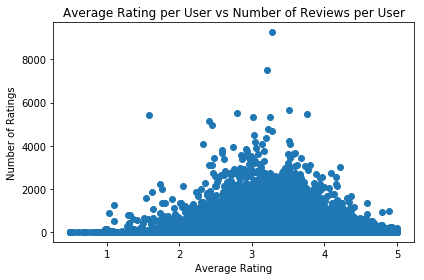

In [27]:
import matplotlib.pyplot as plt
N = 50
x = average_rating_list
y = list_of_rating_numbers

plt.scatter(x, y)

plt.title('Average Rating per User vs Number of Reviews per User')
plt.xlabel('Average Rating')
plt.ylabel('Number of Ratings')
plt.tight_layout()
plt.savefig('Images/Average_Rating_per_User_vs_Number_of_Reviews_per_User')

plt.show()